Tutorial for saving and loading models

In [1]:
import orbitflows as of
import torch
from functools import partial
import inspect

In [2]:
from orbitflows import potential_key_mappings as pm
from orbitflows.utils import potential_function_mappings as pfm

In [3]:
training_data, aa_guess = of.generate_sho_orbits(10, 1, 2*torch.pi, 1000)

In [4]:
model = of.HamiltonianMappingModel(partial(of.isoDiskPotential, amp=2, sigma=0.5), 2, 5, 1)

In [6]:
model.train(training_data, 1000)

100%|██████████| 1000/1000 [00:07<00:00, 135.78it/s]


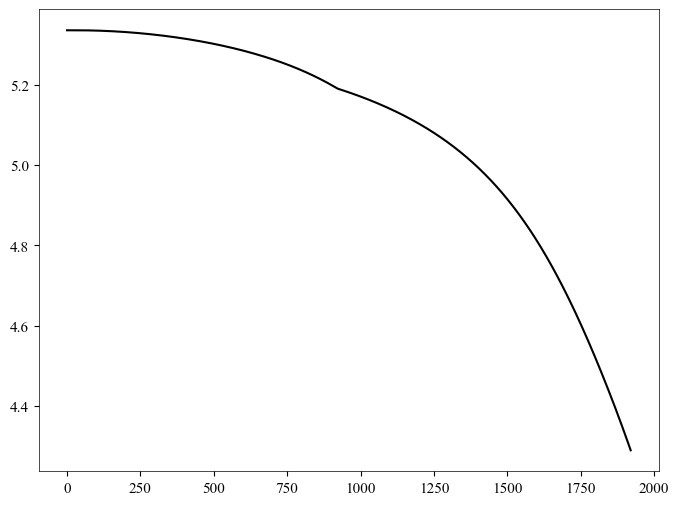

In [9]:
import matplotlib.pyplot as plt
plt.plot(model.loss_list)


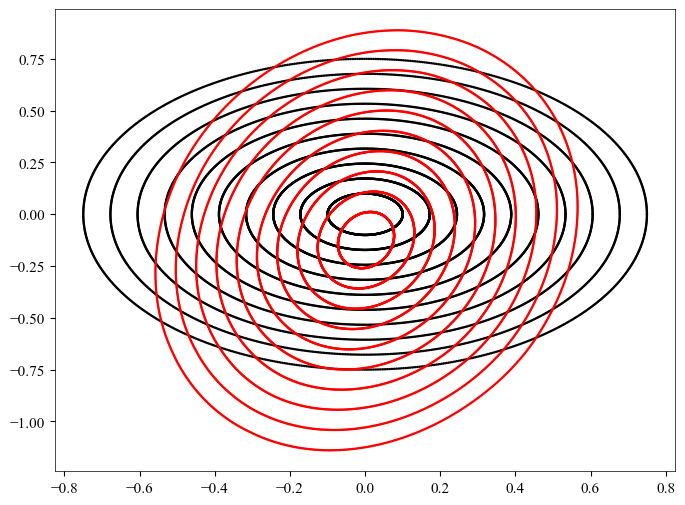

In [10]:
nf_ps = model.flow(training_data)
plt.scatter(*training_data.T, c='k', s=3)
plt.scatter(nf_ps[...,0].detach(), nf_ps[...,1].detach(), s=3, c='r')

# Save Model

In [11]:
filename = 'saved_model_example'
model.save(filename)

# Load Model

In [12]:
loaded_model = of.HamiltonianMappingModel.load(filename)

/Users/gabrielpfaffman/Repos/orbitflows/orbitflows/model/HamiltonianMappingModel.py:134: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  instance.flow.load_state_dict(torch.lo

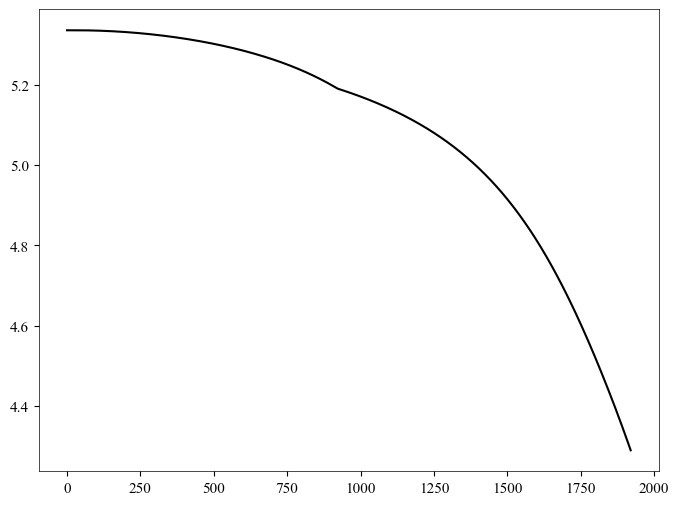

In [16]:
plt.plot(loaded_model.loss_list)

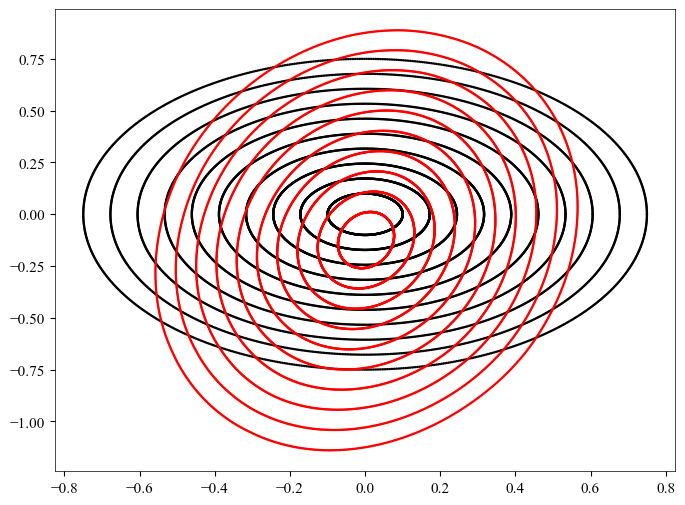

In [17]:
loaded_nf_ps = loaded_model.flow(training_data)
plt.scatter(*training_data.T, c='k', s=3)
plt.scatter(loaded_nf_ps[...,0].detach(), loaded_nf_ps[...,1].detach(), s=3, c='r')